In [2144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2145]:
data = pd.read_csv('diabetes.csv')

In [2146]:
data.shape

(768, 9)

In [2147]:
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [2148]:
data.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

there are 0 values in columns 'Insulin", 'BMI', 'SkinThikness', 'BloodPressure' which seems suspiciously   

In [2149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [2150]:
data.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

The target variable is binary, with a mean of 0.35, indicating about 35% of the individuals have diabetes. 

**Potential Issues:**
Features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have minimum values of 0, which may represent missing or invalid data that needs to be handled (e.g., imputation or removal).

In [2151]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

the dataset doesn't have null values

In [2152]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

the dataset does not have nan values 

In [2153]:
data.duplicated().sum()

0

There is no duplicates in the dataset

In [2154]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

A lot of zero values.
 
- Glucose only 5 zero values 
- SkinThickness - 227, however not sure if it is a good predictor for outcome 
- Insulin - 374, and it could be very important predictor for outcome 
- BMI - 11, 
- Outcome - 500, means that 500 True Negatives outcomes, in other words healthy.   

Let's check the correlation between features to make a decision how to handle this issue


In [2155]:
dataCopy = data.copy()

Let's change 0 values with NaN to handle them easier 

In [2156]:
# Changing 0 values with NaN
dataCopy[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] = dataCopy[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].replace(0, np.NaN)
dataCopy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [2157]:
dataCopy.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

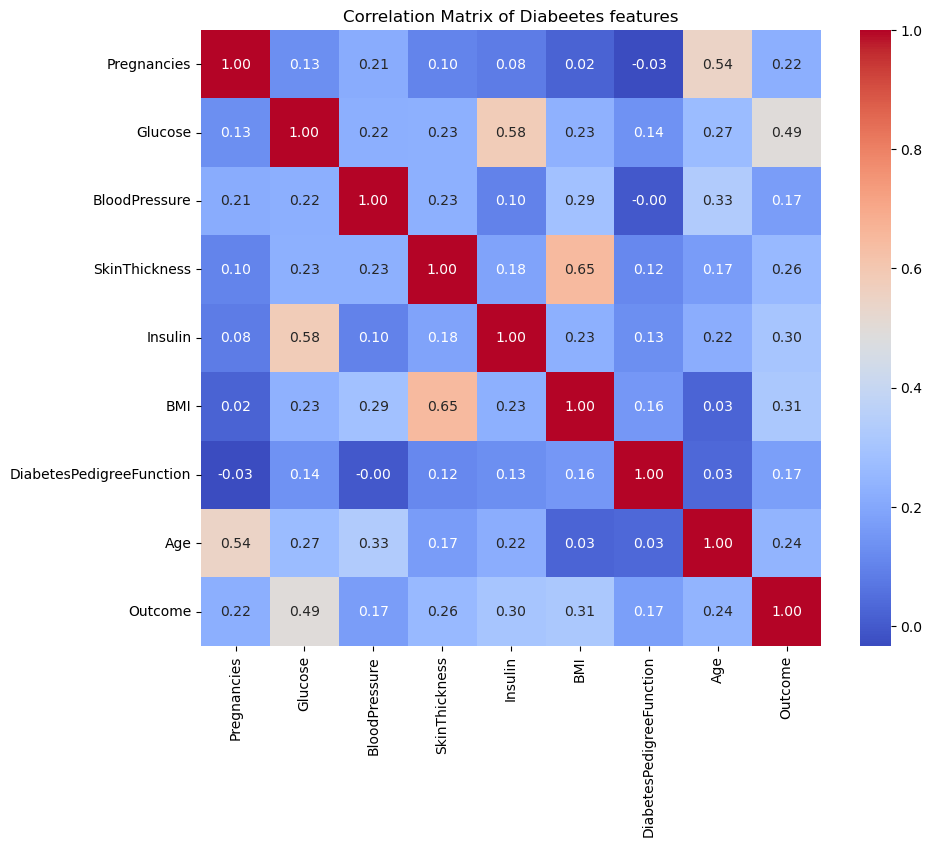

In [2158]:
correlations = dataCopy.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabeetes features')
plt.show()

Imputing missing data, we should use the mean if the data has a normal distribution and the median if the data is skewed.
 
Let's plot histogram to visualise distribution

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

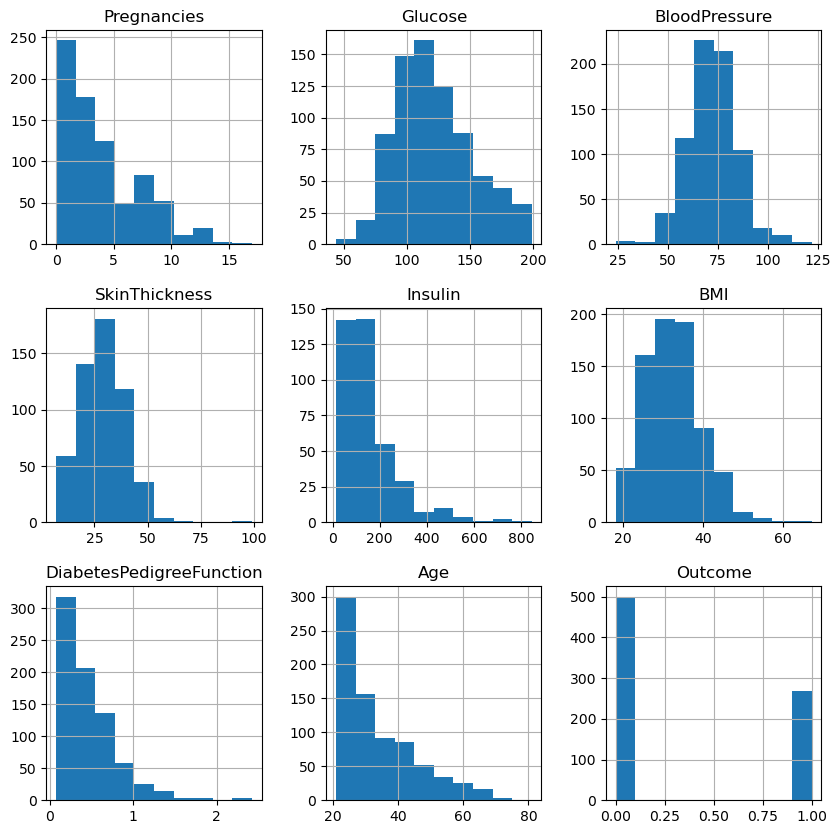

In [2159]:
dataCopy.hist(figsize = (10,10))

Normal distribution - Glucose, BloodPresure 

Skewed - SkinThickness, Insulin, BMI 



<Axes: xlabel='DiabetesPedigreeFunction'>

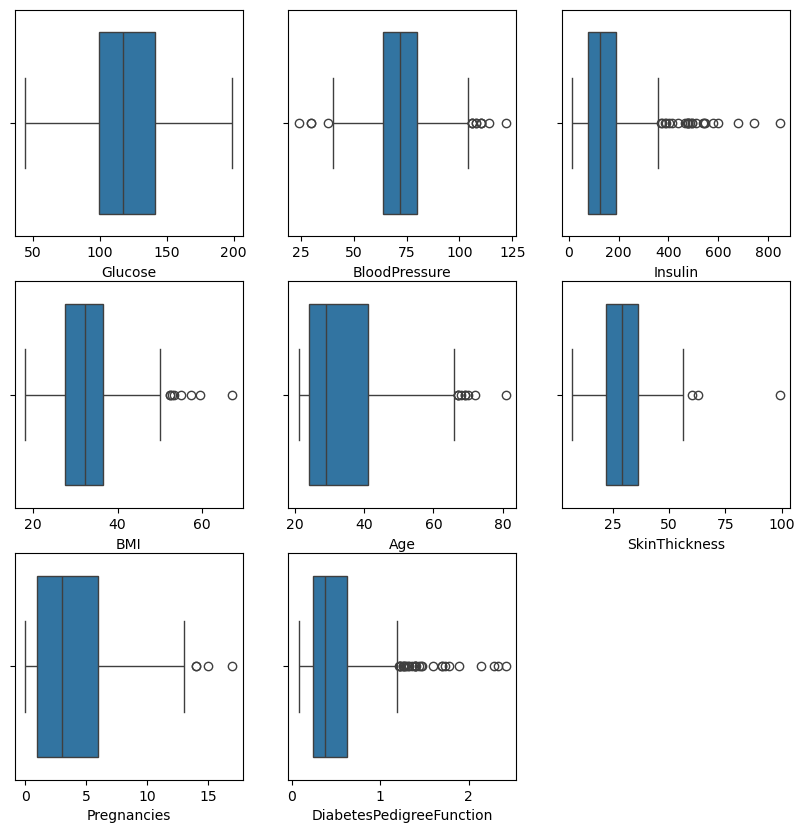

In [2160]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=dataCopy)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=dataCopy)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=dataCopy)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=dataCopy)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=dataCopy)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=dataCopy)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=dataCopy)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=dataCopy)

## Missing Values Handling 

- Method 1 (General Mean/Median Imputation)
- Method 2 (Conditional Median Imputation) 


### Method 1 (General Mean/Median Imputation)

In [2161]:
# Imputing NaN values in features(columns) according their distribution
dataCopy['Glucose'].fillna(dataCopy['Glucose'].mean(), inplace=True)
dataCopy['BloodPressure'].fillna(dataCopy['BloodPressure'].mean(), inplace=True)
dataCopy['SkinThickness'].fillna(dataCopy['SkinThickness'].median(), inplace=True)
dataCopy['BMI'].fillna(dataCopy['BMI'].median(), inplace=True)
dataCopy['Insulin'].fillna(dataCopy['Insulin'].median(), inplace=True)

In [2162]:
dataCopy.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2163]:
dataCopy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [2164]:
dataCopy.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.686763  30.435949  44.000   99.75000   
BloodPressure             768.0   72.405184  12.096346  24.000   64.00000   
SkinThickness             768.0   29.108073   8.791221   7.000   25.00000   
Insulin                   768.0  140.671875  86.383060  14.000  121.50000   
BMI                       768.0   32.455208   6.875177  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.202592   80.00000  122.00  
SkinThickness              29.000000   32.00000   99.00  
Insulin                   125.000000  127.25000  846.00  
BMI                        32.300000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
Outcome                     0.000000    1.00000    1.00

### Method 2 (Conditional Median Imputation) 

In [2165]:
dataCopy_approach2 = data.copy()

In [2166]:
# Changing 0 values with NaN
dataCopy_approach2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']] = dataCopy_approach2[['Insulin', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].replace(0, np.NaN)
dataCopy_approach2.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [2167]:
def median_target(column):   
    temp = dataCopy_approach2[dataCopy_approach2[column].notnull()]
    temp = temp[[column, 'Outcome']].groupby(['Outcome'])[[column]].median().reset_index()
    return temp

In [2168]:
median_target('Insulin')

Outcome  Insulin
0        0    102.5
1        1    169.5

In [2169]:
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 0 ) & (dataCopy_approach2['Insulin'].isnull()), 'Insulin'] = 102.5
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 1 ) & (dataCopy_approach2['Insulin'].isnull()), 'Insulin'] = 169.5

In [2170]:
median_target('Glucose')

Outcome  Glucose
0        0    107.0
1        1    140.0

In [2171]:
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 0 ) & (dataCopy_approach2['Glucose'].isnull()), 'Glucose'] = 107
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 1 ) & (dataCopy_approach2['Glucose'].isnull()), 'Glucose'] = 140

In [2172]:
median_target('SkinThickness')

Outcome  SkinThickness
0        0           27.0
1        1           32.0

In [2173]:
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 0 ) & (dataCopy_approach2['SkinThickness'].isnull()), 'SkinThickness'] = 27
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 1 ) & (dataCopy_approach2['SkinThickness'].isnull()), 'SkinThickness'] = 32

In [2174]:
median_target('BloodPressure')

Outcome  BloodPressure
0        0           70.0
1        1           74.5

In [2175]:
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 0 ) & (dataCopy_approach2['BloodPressure'].isnull()), 'BloodPressure'] = 70
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 1 ) & (dataCopy_approach2['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

In [2176]:
median_target('BMI')

Outcome   BMI
0        0  30.1
1        1  34.3

In [2177]:
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 0 ) & (dataCopy_approach2['BMI'].isnull()), 'BMI'] = 30.1
dataCopy_approach2.loc[(dataCopy_approach2['Outcome'] == 1 ) & (dataCopy_approach2['BMI'].isnull()), 'BMI'] = 34.3

In [2178]:
dataCopy_approach2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [2179]:
dataCopy_approach2.describe().T

count        mean        std     min        25%  \
Pregnancies               768.0    3.845052   3.369578   0.000    1.00000   
Glucose                   768.0  121.677083  30.464161  44.000   99.75000   
BloodPressure             768.0   72.389323  12.106039  24.000   64.00000   
SkinThickness             768.0   29.089844   8.890820   7.000   25.00000   
Insulin                   768.0  141.753906  89.100847  14.000  102.50000   
BMI                       768.0   32.434635   6.880498  18.200   27.50000   
DiabetesPedigreeFunction  768.0    0.471876   0.331329   0.078    0.24375   
Age                       768.0   33.240885  11.760232  21.000   24.00000   
Outcome                   768.0    0.348958   0.476951   0.000    0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              28.0000   32.00000   99.00  
Insulin                   102.5000  169.50000  846.00  
BMI                        32.0500   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

# Data Visualisation

Countplot - to understand whether data balanced or not
Box Plot - to analise the distribution and see the outliers


/var/folders/gy/h5y3_kbs6szbnr0bc8mnr2qc0000gn/T/ipykernel_1705/513448772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=dataCopy_approach2, palette="Set2")


<Axes: xlabel='Outcome', ylabel='count'>

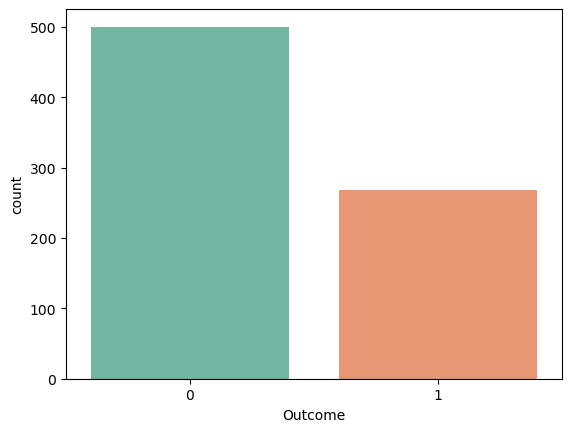

In [2180]:
# Countplot 
sns.countplot(x='Outcome', data=dataCopy_approach2, palette="Set2")

People without diabetes are far more than people with the desease.
This indicates that the data is unbalanced. 

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

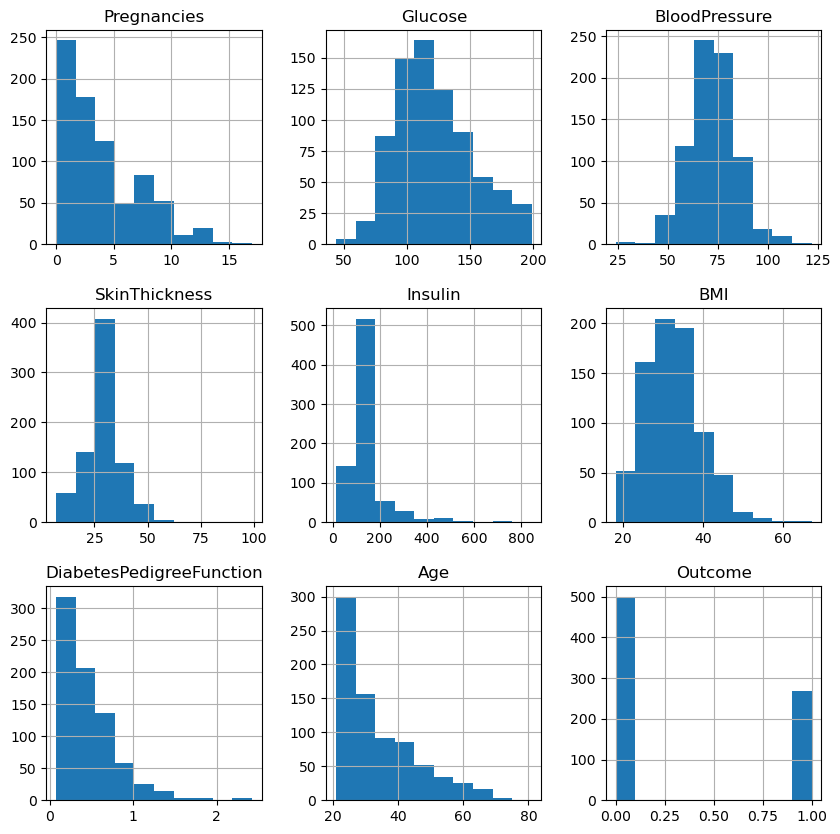

In [2181]:
dataCopy_approach2.hist(figsize = (10,10))

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<Axes: xlabel='DiabetesPedigreeFunction'>

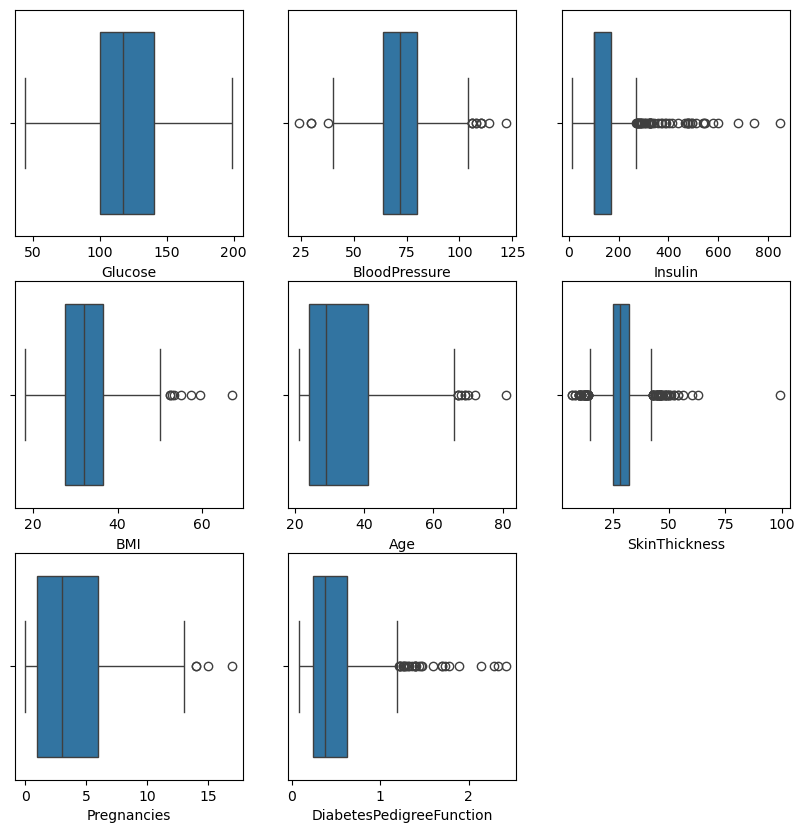

In [2182]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x='Glucose', data=dataCopy_approach2)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure', data=dataCopy_approach2)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin', data=dataCopy_approach2)
plt.subplot(3,3,4)
sns.boxplot(x='BMI', data=dataCopy_approach2)
plt.subplot(3,3,5)
sns.boxplot(x='Age', data=dataCopy_approach2)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness', data=dataCopy_approach2)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies', data=dataCopy_approach2)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction', data=dataCopy_approach2)

array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcom

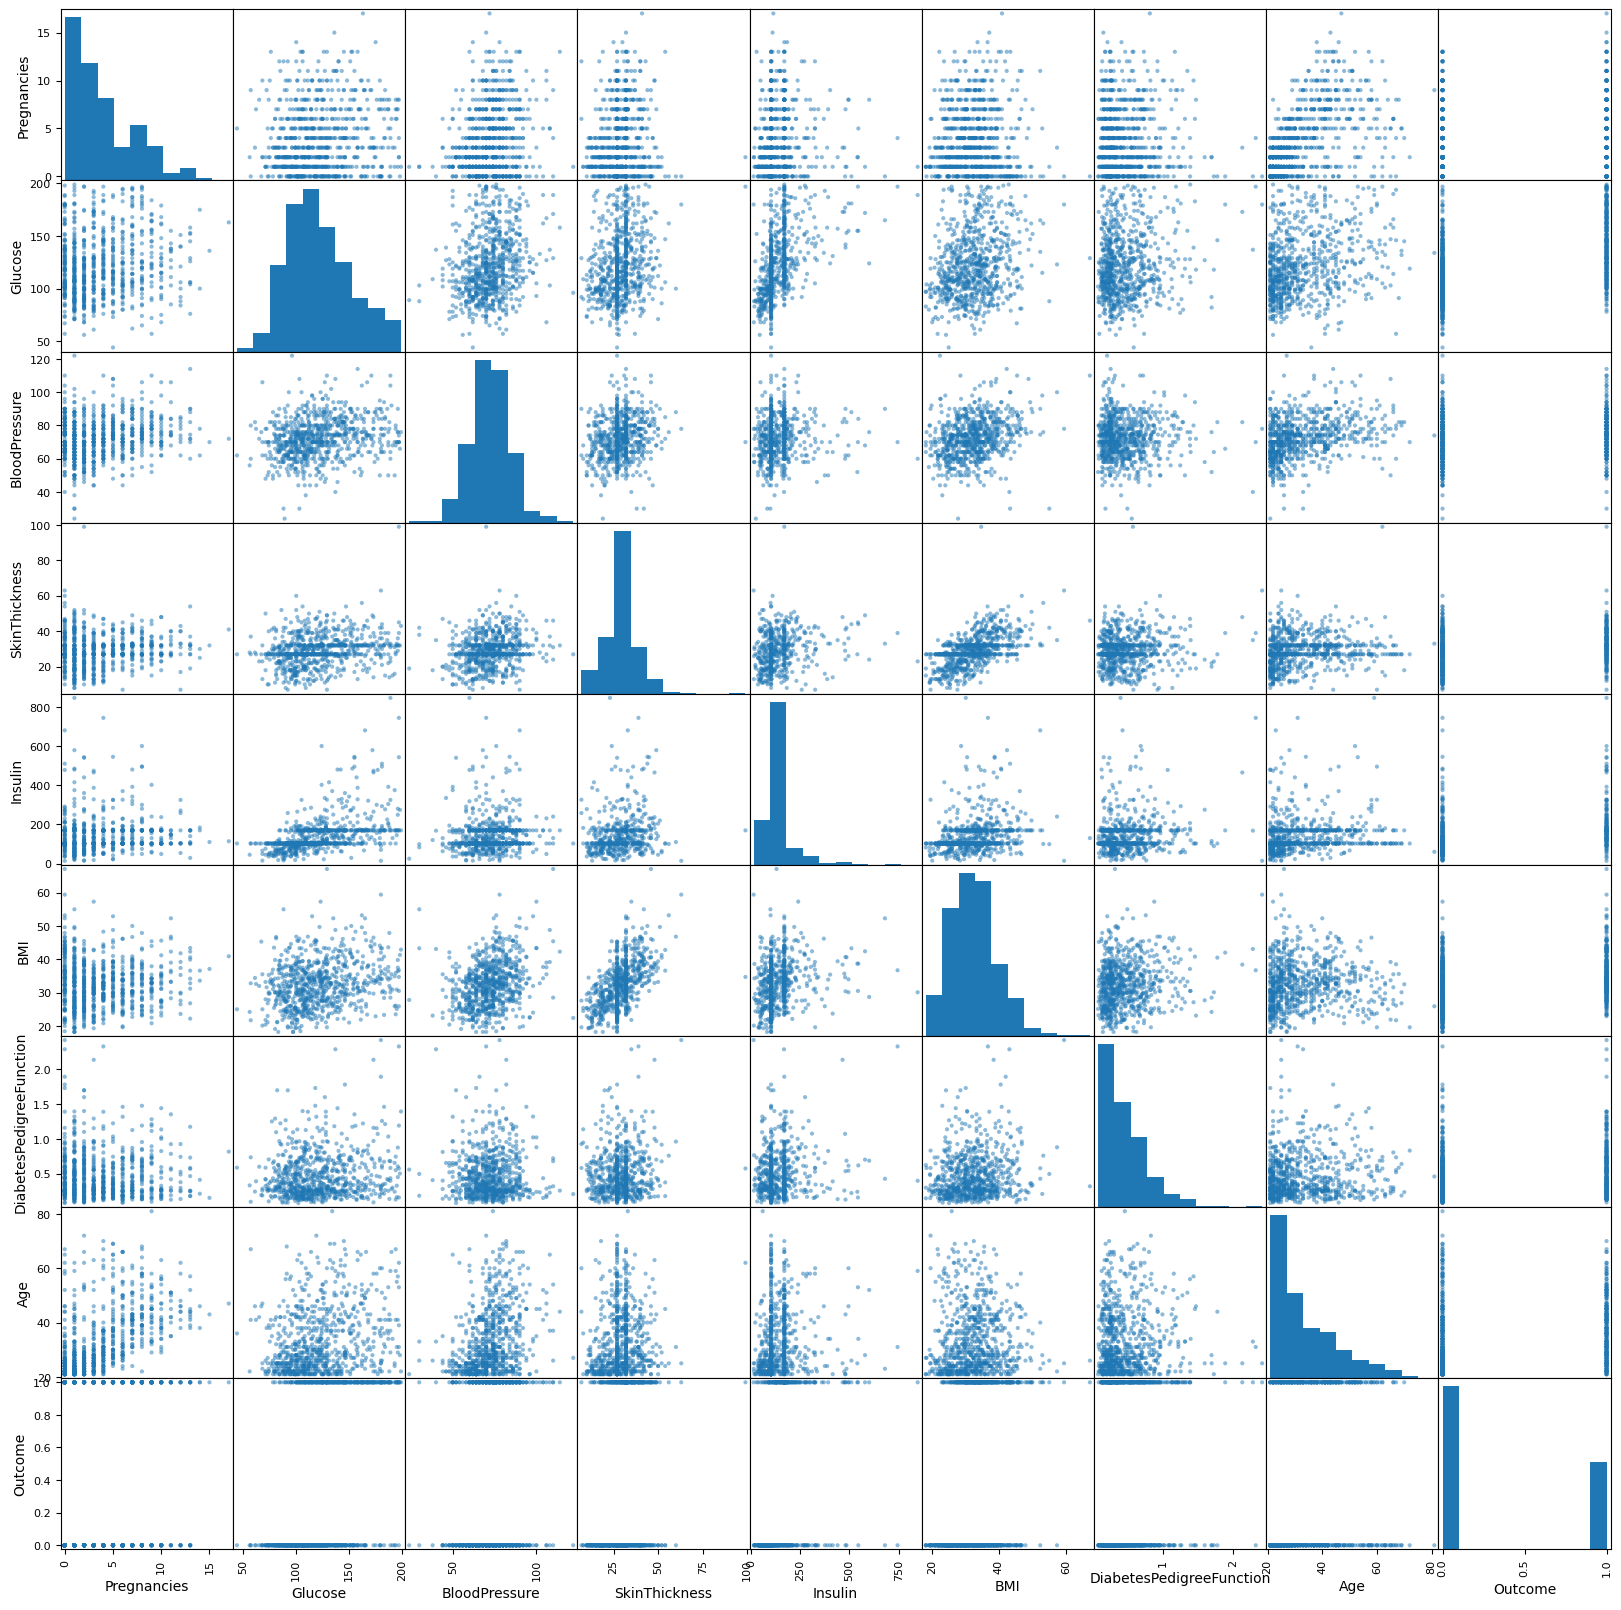

In [2183]:
scatter_matrix(dataCopy_approach2, figsize=(20,20))

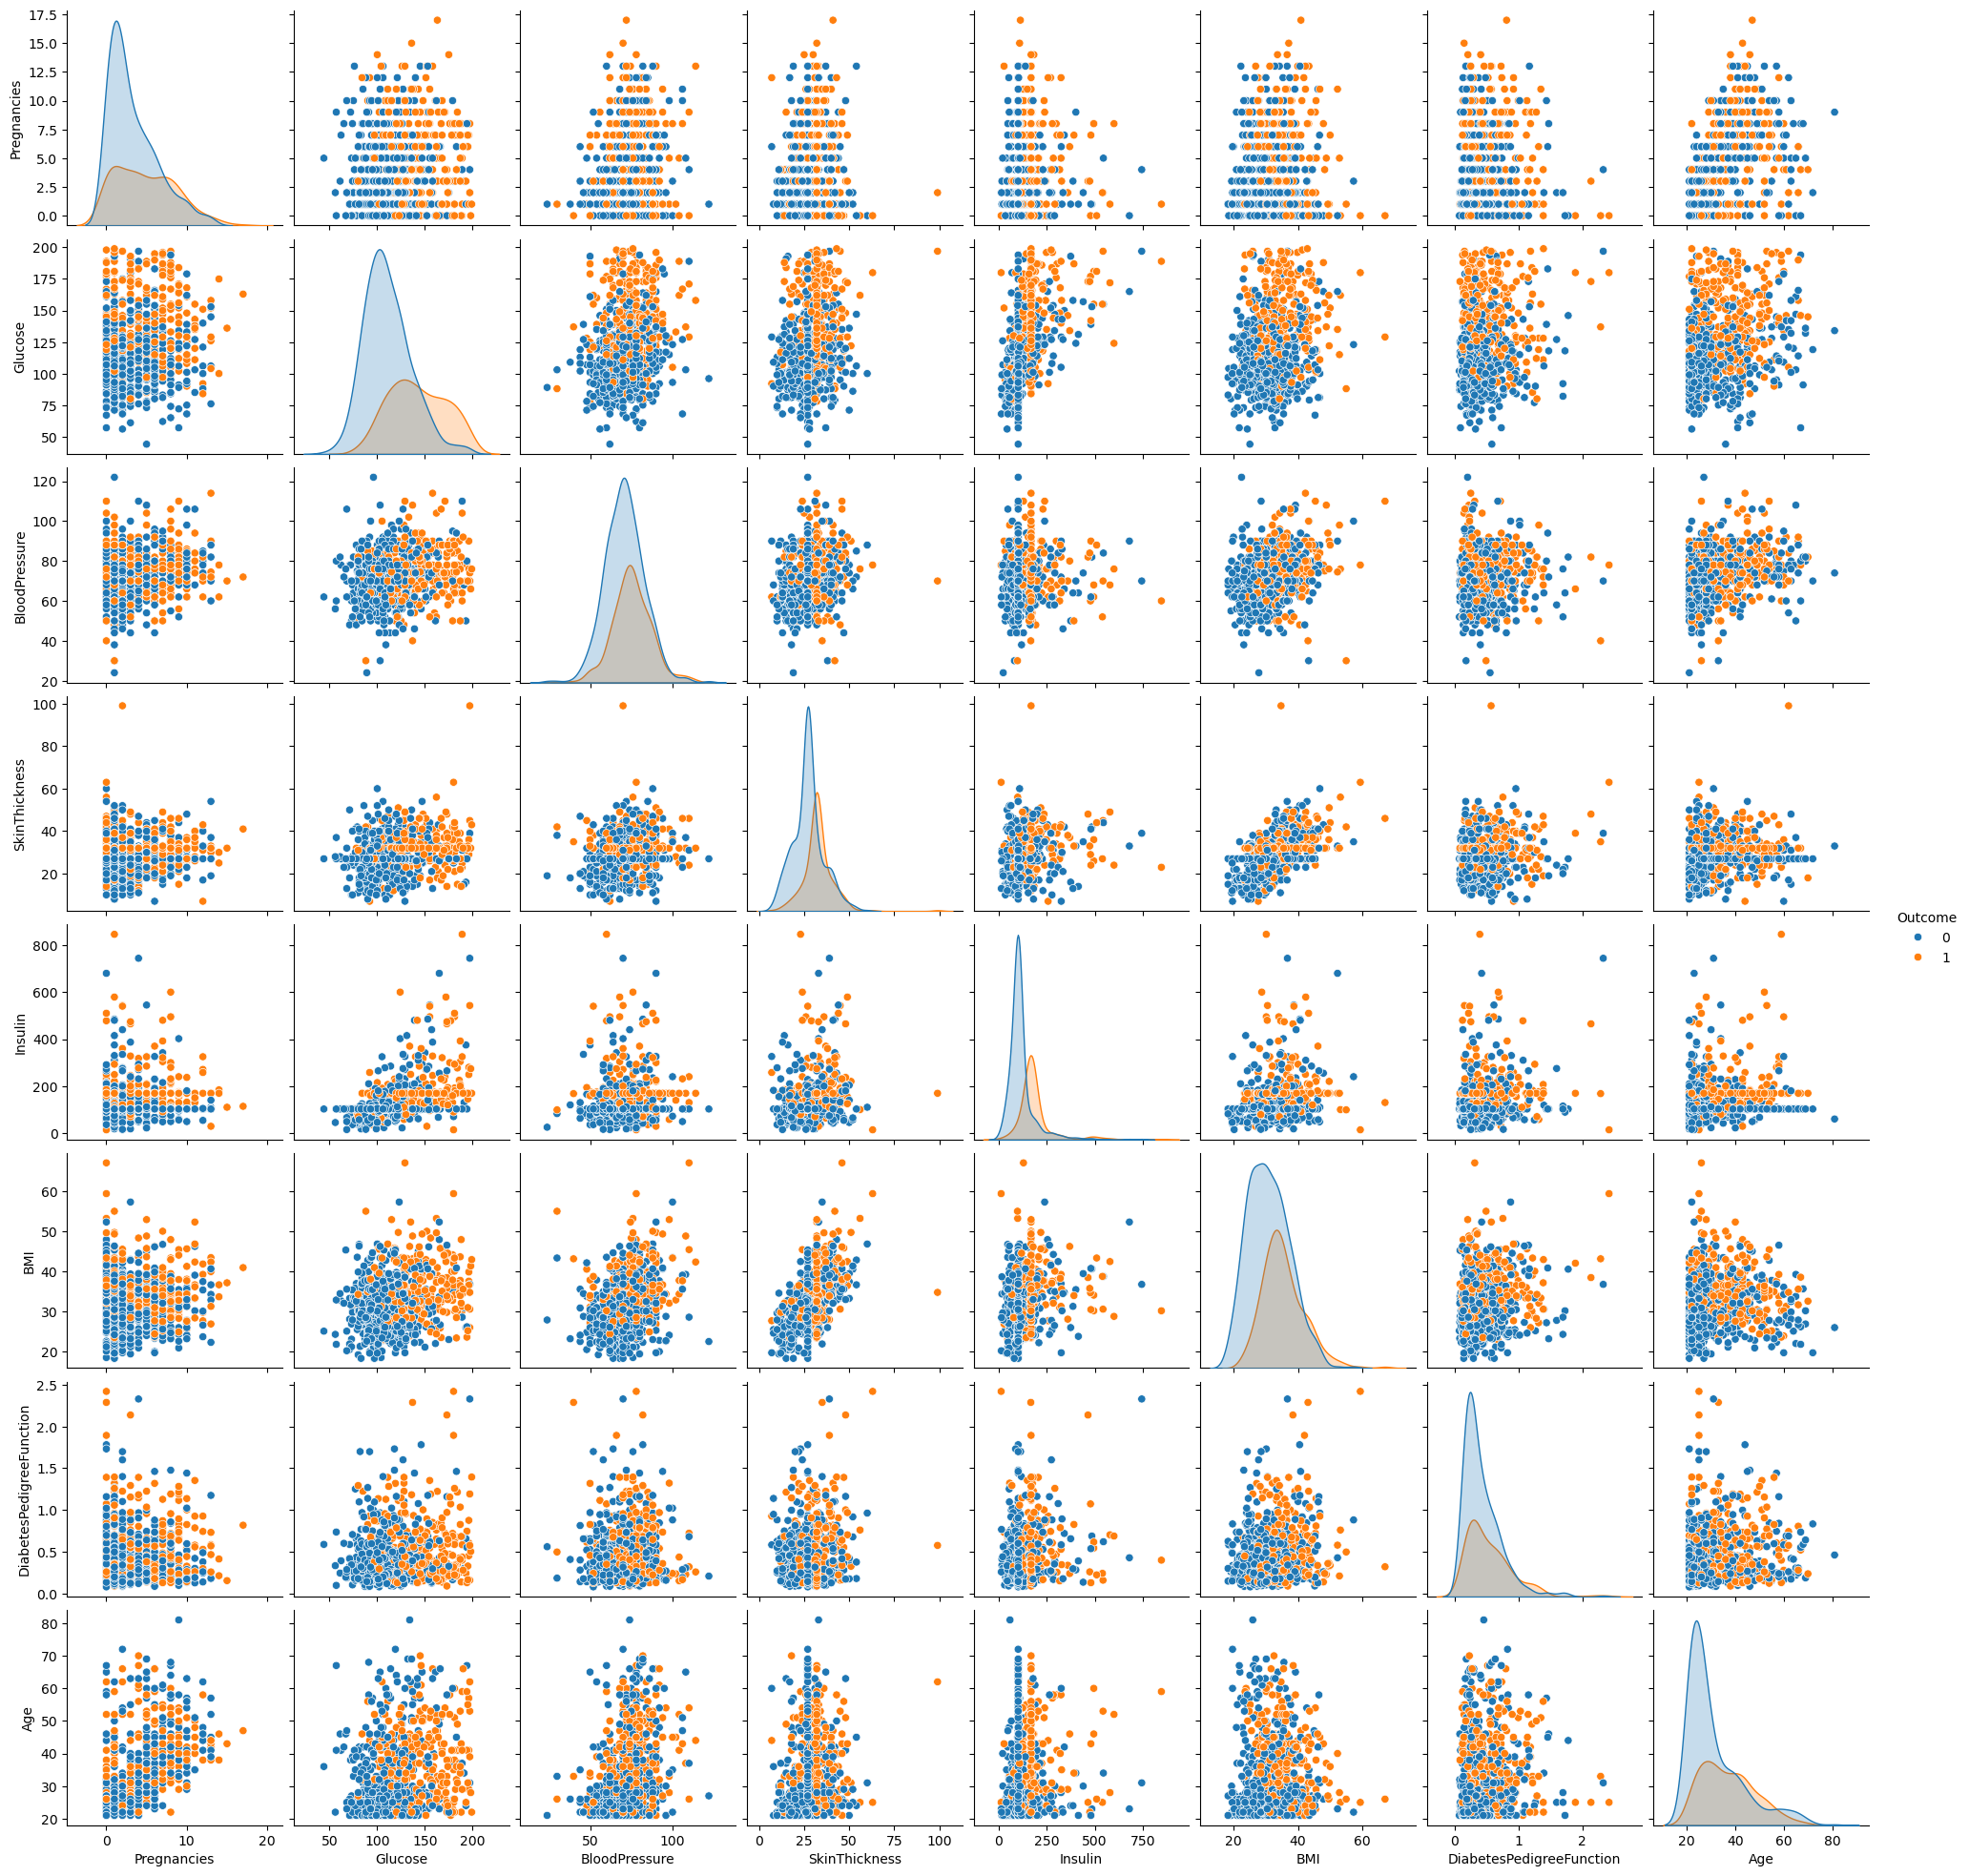

In [2184]:
sns.pairplot(dataCopy_approach2, hue='Outcome')
plt.show()

# Feaure Creation 

# Feature Selection

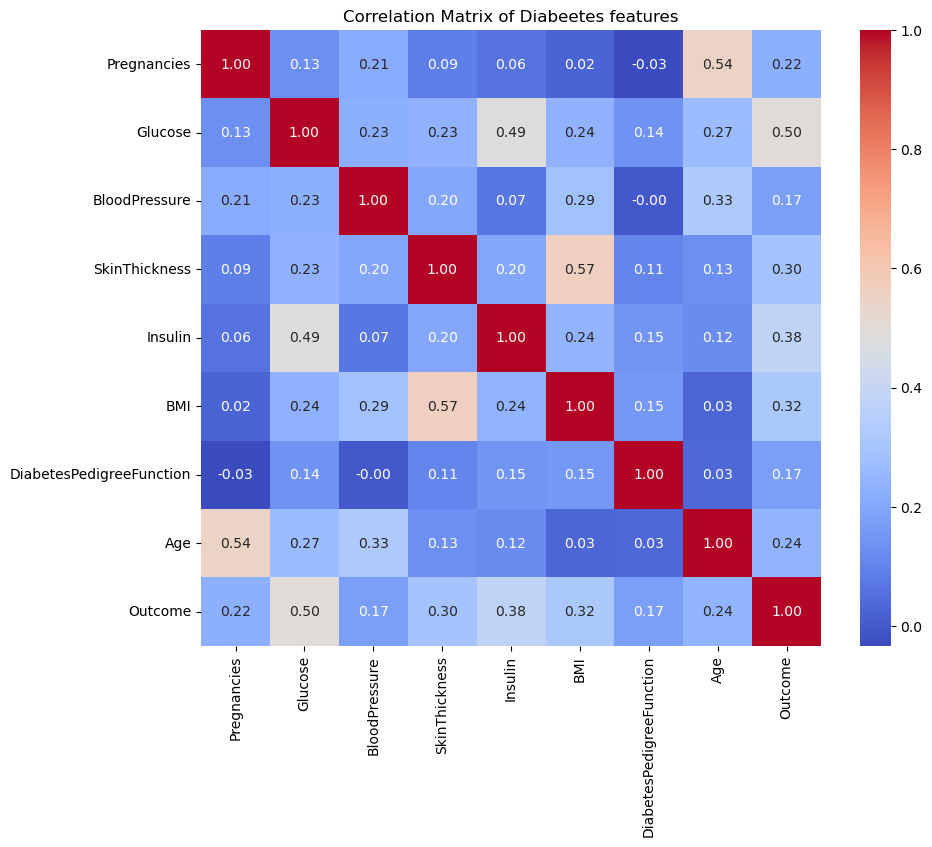

In [2185]:
correlations = dataCopy_approach2.corr() # Default method is Pearson 
plt.figure(figsize=(10,8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Diabeetes features')
plt.show()

In [2186]:
print(correlations['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.495990
Insulin                     0.377081
BMI                         0.315577
SkinThickness               0.295138
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.174469
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


The most correlated with Outcome features are: Glucose, Insulin, BMI, SkinThickness and Age. 
Insulin corelated with Glucose 
Pregnancies correlated with Age 
SkinThickness and BMI 

BloodPressure has low correlation with the Outcome. However it has better correlation with Age and BMI. 
SkinThickness has low correlation with the Outcome. However it has good correlation with BMI.
DiabetesPedegreeFunction is correlated badly with the Outcome. 

In [2187]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
X = dataCopy_approach2.drop('Outcome',axis='columns')
y = dataCopy_approach2['Outcome']

model.fit(X, y)

feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

                    Feature  Importance
4                   Insulin    0.384428
1                   Glucose    0.146659
3             SkinThickness    0.135514
7                       Age    0.095115
5                       BMI    0.078295
6  DiabetesPedigreeFunction    0.067931
2             BloodPressure    0.046784
0               Pregnancies    0.045274


In [2188]:
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

# Get feature selection results
selected_features = X.columns[rfe.support_]  # Selected features
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Print results
print("Selected Features:")
print(selected_features)

print("\nFeature Ranking:")
print(feature_ranking)


Selected Features:
Index(['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age'], dtype='object')

Feature Ranking:
                    Feature  Ranking
1                   Glucose        1
3             SkinThickness        1
4                   Insulin        1
5                       BMI        1
7                       Age        1
6  DiabetesPedigreeFunction        2
0               Pregnancies        3
2             BloodPressure        4


We can drop Pregnancies, BloodPressure and DiabetesPedigreeFunction

In [2189]:
# droped_features = ['Pregnancies','BloodPressure', 'DiabetesPedigreeFunction']
droped_features = ['Pregnancies','BloodPressure', 'DiabetesPedigreeFunction']
dataCopy_selected = dataCopy_approach2.drop(droped_features, axis='columns')
dataCopy_selected.head()

Glucose  SkinThickness  Insulin   BMI  Age  Outcome
0    148.0           35.0    169.5  33.6   50        1
1     85.0           29.0    102.5  26.6   31        0
2    183.0           32.0    169.5  23.3   32        1
3     89.0           23.0     94.0  28.1   21        0
4    137.0           35.0    168.0  43.1   33        1

# Handling Outliers

- Outliers identification 
- Removing Outliers
- Transforming Outliers (Capping)
- Tranforming Outliers using Quantile Transformer

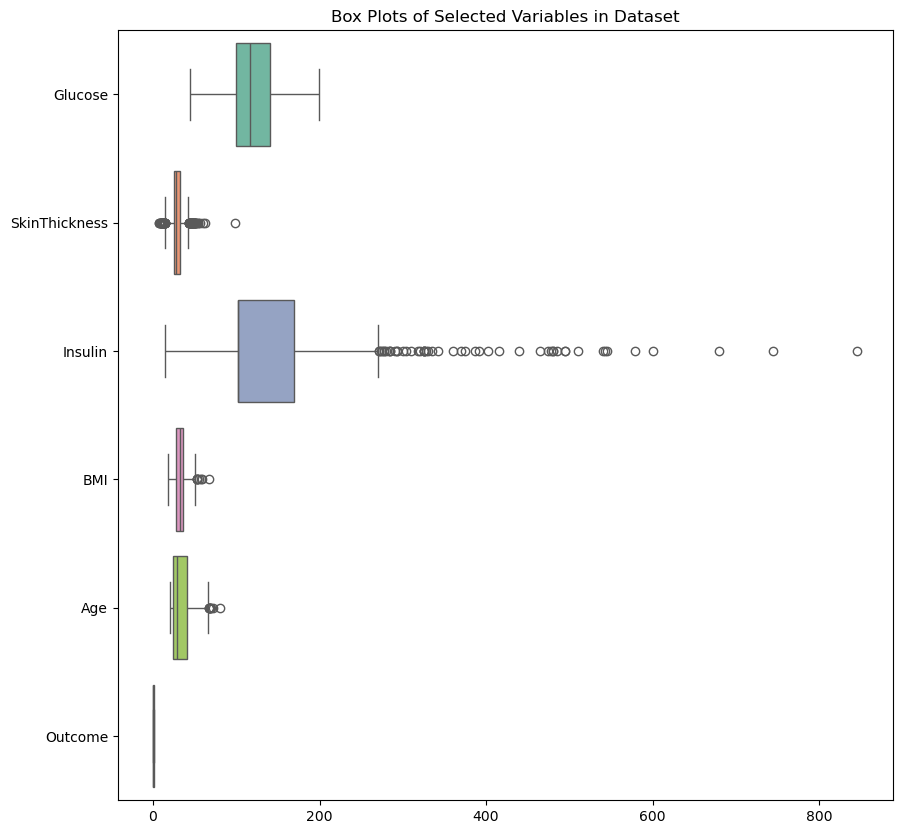

In [2213]:
plt.figure(figsize=(10,10))
sns.boxplot(dataCopy_selected, orient='h', palette='Set2')
plt.title('Box Plots of Selected Variables in Dataset')
plt.show()

# Identification using IQR

In [2191]:
def find_outliers_iqr(data, column): 

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[column] < lower_bound) | (data[column] > upper_bound)

# Combine outliers for all selected columns
outlier_mask = pd.Series(False, index=dataCopy_selected.index)

for column in dataCopy_selected.columns:
    outliers = find_outliers_iqr(data,column)
    print(f"Number of outliers in '{column}': '{outliers.sum()}'")
    outlier_mask = outlier_mask | outliers  # Combine masks using OR

Number of outliers in 'Glucose': '5'
Number of outliers in 'SkinThickness': '1'
Number of outliers in 'Insulin': '34'
Number of outliers in 'BMI': '19'
Number of outliers in 'Age': '9'
Number of outliers in 'Outcome': '0'


Removing outliers

In [2214]:
data_no_outliers = dataCopy_selected[~outlier_mask]
data_no_outliers.shape

(702, 6)

Transforming Outliers (Capping)

In [2215]:
data_capped = dataCopy_selected.copy()

for column in dataCopy_selected.columns:
    lower_cap = dataCopy_selected[column].quantile(0.05)
    upper_cap = dataCopy_selected[column].quantile(0.95)

    data_capped[column] = np.where(
        data_capped[column] < lower_cap, lower_cap, 
        np.where(data_capped[column] > upper_cap, upper_cap, data_capped[column])
)

data_capped.shape


(768, 6)

Transforming Outliers with QuantileTransformer from sklearn

In [2216]:
from sklearn.preprocessing import QuantileTransformer

data_transformed = dataCopy_selected.copy()

columns_to_transform = ['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# Initialize the QuantileTransformer
quantile = QuantileTransformer()
# Apply the transformation to selected columns
data_transformed[columns_to_transform] = quantile.fit_transform(data_transformed[columns_to_transform])

data_transformed.shape


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


(768, 6)

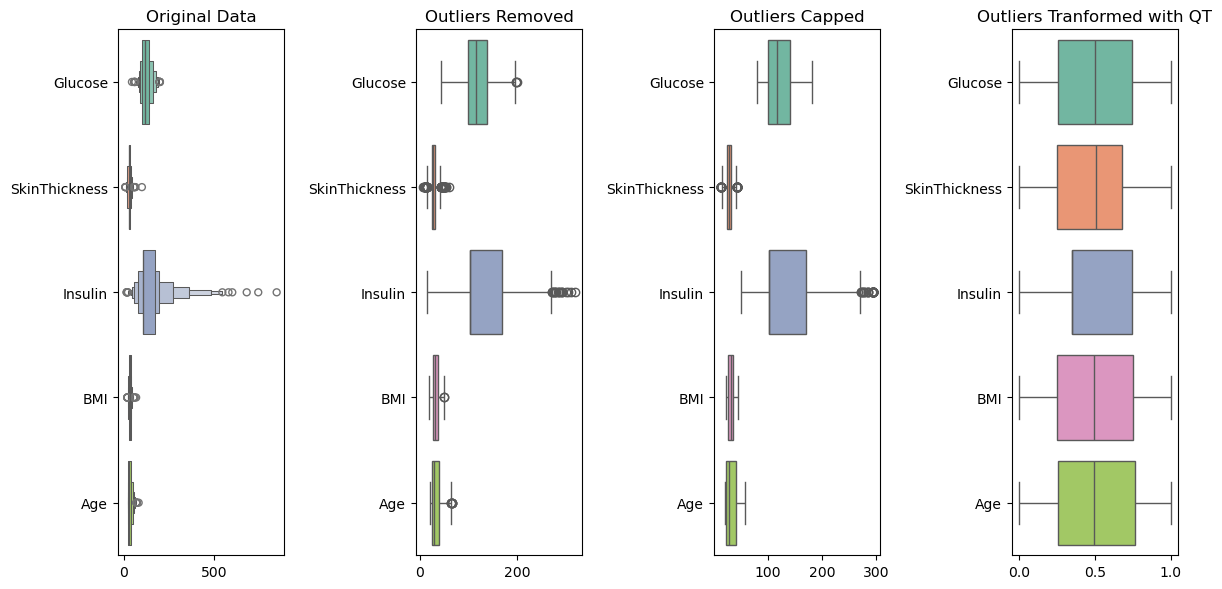

In [2198]:
plt.figure(figsize=(12, 6))

plt.subplot(1,4,1)
sns.boxenplot(dataCopy_selected[columns_to_transform], orient='h', palette='Set2')
plt.title('Original Data')

plt.subplot(1,4,2)
sns.boxplot(data_no_outliers[columns_to_transform], orient='h', palette='Set2')
plt.title('Outliers Removed')

plt.subplot(1,4,3)
sns.boxplot(data_capped[columns_to_transform], orient='h', palette='Set2')
plt.title('Outliers Capped')

plt.subplot(1,4,4)
sns.boxplot(data_transformed[columns_to_transform], orient='h', palette='Set2')
plt.title('Outliers Tranformed with QT')

plt.tight_layout()
plt.show()

# Normalise the Data

In [2199]:
# Min-Max Scaling
data_minmax = data_no_outliers.copy()
features_to_scale = ['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']

#Initialise the MinMaxScaler
scaler = MinMaxScaler()

data_minmax[features_to_scale] = scaler.fit_transform(data_minmax[features_to_scale])

In [2200]:
# Standard Scaling
data_standard = data_no_outliers.copy()

# Initialise the StandardScaler 
scaler = StandardScaler()

data_standard[features_to_scale] = scaler.fit_transform(data_standard[features_to_scale])


In [2217]:
print('MinMax Scaled Data:')
print(data_minmax.head())
print('\nStandard Scale Data:')
print(data_standard.head())
print('\nTransformed with QT:')
print(data_transformed.head())

MinMax Scaled Data:
    Glucose  SkinThickness   Insulin       BMI       Age  Outcome
0  0.670968       0.528302  0.509901  0.484277  0.644444        1
1  0.264516       0.415094  0.288779  0.264151  0.222222        0
2  0.896774       0.471698  0.509901  0.160377  0.244444        1
3  0.290323       0.301887  0.260726  0.311321  0.000000        0
4  0.600000       0.528302  0.504950  0.783019  0.266667        1

Standard Scale Data:
    Glucose  SkinThickness   Insulin       BMI       Age  Outcome
0  0.949450       0.753418  0.796839  0.225661  1.557265        1
1 -1.180960       0.032519 -0.474611 -0.851673 -0.168601        0
2  2.133011       0.392968  0.796839 -1.359559 -0.077766        1
3 -1.045696      -0.688379 -0.635914 -0.620816 -1.076952        0
4  0.577474       0.753418  0.768374  1.687758  0.013069        1

Transformed with QT:
    Glucose  SkinThickness   Insulin       BMI       Age  Outcome
0  0.810300       0.801825  0.746415  0.589309  0.889831        1
1  0.091265 

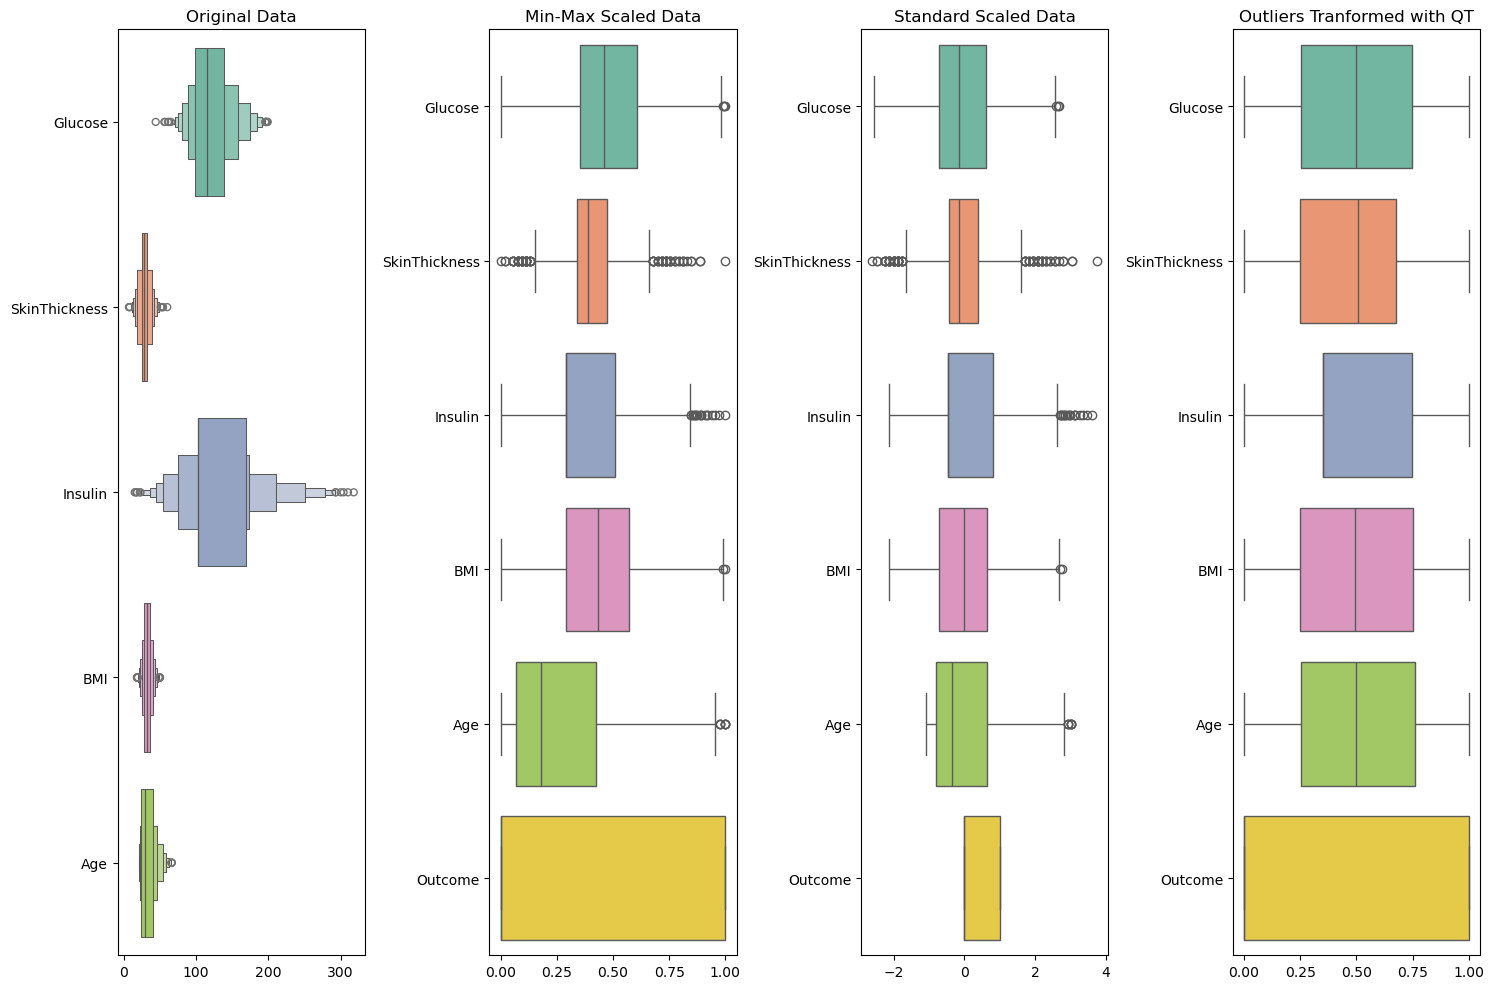

In [2202]:
plt.figure(figsize=(15,10))

#Original Data
plt.subplot(1,4,1)
sns.boxenplot(data = data_no_outliers[features_to_scale], orient='h', palette='Set2')
plt.title('Original Data')

#Min-Max Scaled Data
plt.subplot(1,4,2)
sns.boxplot(data_minmax, orient='h', palette='Set2')
plt.title('Min-Max Scaled Data')

#Standard Scaled Data
plt.subplot(1,4,3)
sns.boxplot(data_standard, orient='h', palette='Set2')
plt.title('Standard Scaled Data')

plt.subplot(1,4,4)
sns.boxplot(data_transformed, orient='h', palette='Set2')
plt.title('Outliers Tranformed with QT')

plt.tight_layout()
plt.show()

# Model Building

Classifiers 
- Logistic Regression
- Random Forest
- SVM 
- Gradient Boosting

In [2203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, auc

# Select features and target variable
# X = data_transformed[['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']]
X = data_transformed.drop('Outcome', axis=1)
y = data_transformed['Outcome']

# Split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape


Glucose  SkinThickness   Insulin       BMI       Age
668  0.225554       0.768579  0.871578  0.614081  0.808344
324  0.440678       0.677966  0.350065  0.713820  0.000000
624  0.382008       0.386571  0.350065  0.431551  0.000000
690  0.364407       0.386571  0.350065  0.123207  0.626467
473  0.708605       0.386571  0.350065  0.367666  0.889831
..        ...            ...       ...       ...       ...
355  0.891786       0.677966  0.746415  0.410691  0.881356
534  0.035854       0.558018  0.067797  0.576271  0.254889
344  0.192960       0.386571  0.350065  0.760756  0.942634
296  0.792699       0.855280  0.968709  0.280965  0.496741
462  0.026728       0.894394  0.044329  0.691656  0.722947

[154 rows x 5 columns]

5 features 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age' are optimal 

## Logistic Regression

In [2204]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [2205]:
# Get weights 
weights = model.coef_
print(weights)

[[2.13699947 1.50525151 3.28644652 0.86538227 1.98649701]]


In [2206]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Make predictions on the train set
y_pred_train = model.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.8306188925081434
Test Accuracy: 0.8376623376623377


** Best Results for Loogistic Regression: **

### Approach 1 of Hanling Missing Values
**Best Feature Set** 
'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure'

Train Accuracy: 0.7907407407407407
Test Accuracy: 0.7777777777777778

Pipeline: 

no_otliers > standard scaling 


Pipeline: no_otliers > minmax scaling 

Train Accuracy: 0.7814814814814814
Test Accuracy: 0.762962962962963


Pipeline: capped > minmax scaling 


Train Accuracy: 0.7785016286644951
Test Accuracy: 0.7532467532467533


Pipeline: capped > standard scaling 

Train Accuracy: 0.7752442996742671
Test Accuracy: 0.7467532467532467


Pipeline: data_transformed 

Train Accuracy: 0.7736156351791531
Test Accuracy: 0.7792207792207793


### Approach 2 of Hanling Missing Values

**Best Feature Set** 
['Glucose', 'SkinThickness', 'Insulin', 'BMI', 'Age']

Pipeline: data_transformed 

Train Accuracy: 0.8306188925081434
Test Accuracy: 0.8376623376623377


Pipeline: no_otliers > minmax scaling 

Train Accuracy: 0.803921568627451
Test Accuracy: 0.8014184397163121


Pipeline: no_otliers > standard scaling 

Train Accuracy: 0.8163992869875223
Test Accuracy: 0.8156028368794326





## Random Forest

In [2207]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, auc

# Initialize the Random Forest classifier
model2 = RandomForestClassifier()

# Fit the model
model2.fit(X_train, y_train)

RandomForestClassifier()

In [2208]:
# Make predictions on the test set
y_pred = model2.predict(X_test)

# Make predictions on the train set
y_pred_train = model2.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 1.0
Test Accuracy: 0.8636363636363636


## SVM

In [2209]:
from sklearn.svm import SVC

model3 = SVC(random_state=42)
model3.fit(X_train, y_train)

SVC(random_state=42)

In [2210]:
# Make predictions on the test set
y_pred = model3.predict(X_test)

# Make predictions on the train set
y_pred_train = model3.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.8876221498371335
Test Accuracy: 0.8766233766233766


## Gradient Boosting

In [2211]:
from sklearn.ensemble import GradientBoostingClassifier

model4 = GradientBoostingClassifier(random_state=42)
model4.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [2212]:
# Make predictions on the test set
y_pred = model4.predict(X_test)

# Make predictions on the train set
y_pred_train = model4.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.988599348534202
Test Accuracy: 0.8571428571428571
